<a href="https://www.kaggle.com/code/shailx/wine-quality-prediction-end-to-end-ml-projects?scriptVersionId=95570077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/Shailesh0209/x_Machine_Learning_Practicals-diploma-IITM/blob/main/x_W1_Wine_Quality(ML_Projects)_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP-W1_wine_quality_Predictions-dip-iitm

# Steps in ML projects
    1. Look at the big picture.
    2. Get the data.
    3. Discover and visualize the data to gain insights.
    4 Prepare the data for Machine Learning algorithms.
    5. Select a model and train it.
    6. Fine-tune your model.
    7. Present your solution.
    8. Launch, monitor and maintain your system.

# Step 1: Look at the big picture.
    1. Frame the problem
    2. Select a performance measure
    3. List and check the assumptions
        1.1 Frame the problem

        - What is input and output?
        - What is the business objective? How does company expects to use and benefit from the model?
                -Useful in problem framing
                -Algorithm and performance measure selection
                -Overall effort estimation
        -What is the current solution (if any)?
            --Provides a useful baseline
            
### Design consideration in problem framing

- Is this a supervised, unsupervised or a RL problem?
- Is this a classification, regression or some other task?
- What is the nature of the output: single or multiple outputs?
- Does system need continuous learning or periodic updates?
- What would be the learning style: batch or online?

### 1.2 Selection of performance measure

Regression
        Mean Squared Error (MSE) or
        Mean Absolute Error (MAE)
Classification
    Precision
    Recall
    F1-score
    Accuracy



### 1.3 Check the assumptions

- List down various assumptions about the task.
- Review with domain experts and other teams that plan to consume ML output.
- Make sure all assumptions are reviewed and approved before coding!

# Step 2: Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

## Check data samples

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Features

In [4]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature List:", feature_list)
print("Label:", label)

Feature List: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


## Data statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
## numeric attributes
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

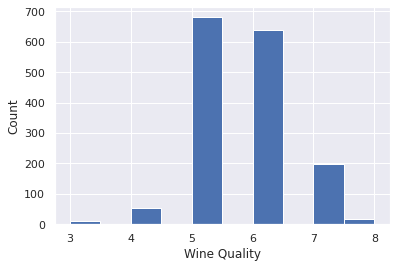

In [8]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

#data.total_sulfur_dioxide.hist()

## Create test set

In [9]:
def split_train_test(data, test_ratio):
    # Set the random seed.
    np.random.seed(42)

    # Shuffle the dataset
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)

    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(data, 0.2)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Perform random sampling on our dataset:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Stratified sampling

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [15]:
overall_dist = data["quality"].value_counts() / len(data)

In [16]:
# Let's look at them side-by-side
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [17]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [18]:
# Let's contrast this with random sampling:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

In [19]:
# Sampling bias comparison
#dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

# Step 3: Data Visualization

In [20]:
exploration_set = strat_train_set.copy()

### Scatter Visualization

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

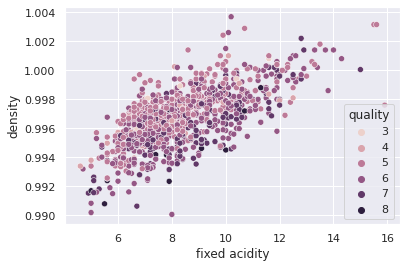

In [21]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',
                data=exploration_set)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

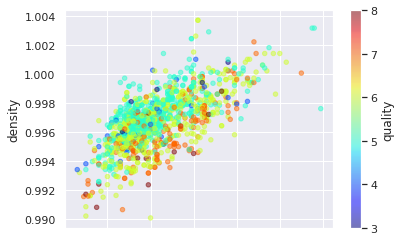

In [22]:
## with matplotlib
exploration_set.plot(kind='scatter', x='fixed acidity',
                     y='density', alpha=0.5,
                     c="quality", cmap=plt.get_cmap("jet"))

In [23]:
corr_matrix = exploration_set.corr() # corr funcn to calculate correlation

In [24]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

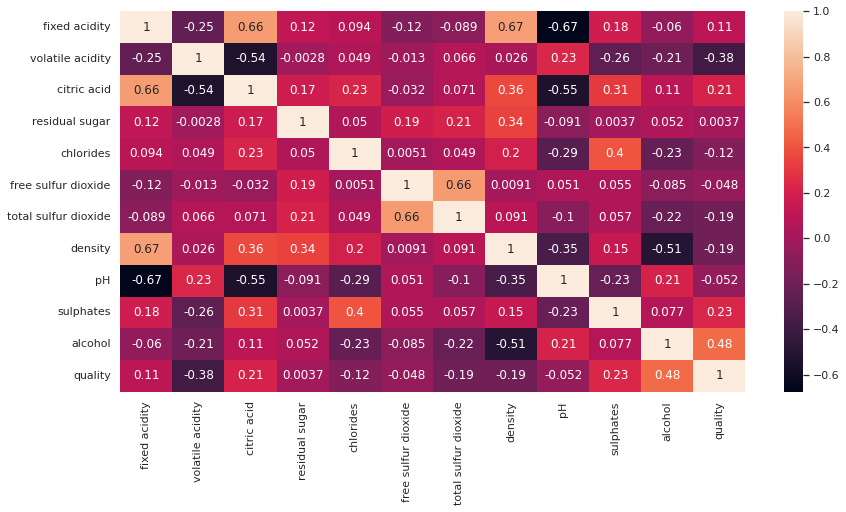

In [25]:
# correlation matrix with heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)

array([[<AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot:xlabel='quality', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot:xlabel='pH', ylabel='pH'>,
        <AxesSubplot:xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot:xlabel='sulphates', ylabel='pH'>,
        <AxesSubplot:xlabel='quality', ylabel='pH'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <AxesSubplot:xlabel='pH', ylabel='sulphates'>,
        <A

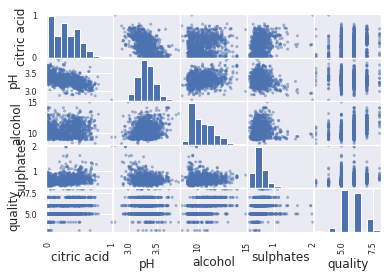

In [26]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

# Step 4: Prepare data for ML algorithm

## Separate features and labels from the training set.

In [27]:
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop("quality", axis=1) 

# Copy the label list
wine_labels = strat_train_set['quality'].copy()

## Data cleaning

In [28]:
wine_features.isna().sum() # counts the no. of NaN in each column of wine_feature


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [30]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [31]:
# Let's check the statistics learnt by the imputer on the training set
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [32]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [33]:
tr_features = imputer.transform(wine_features)

In [34]:
tr_features.shape

(1279, 11)

In [35]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

## Handling text and categorical attributes

### Converting categories to numbers:

In [36]:
#### 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [37]:
## Using One hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

## Transformation Pipeline


*   Scikit-Learn provides a Pipeline class to line up transformations in an intended order.




In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)



*   Pipeline has a sequence of transformations - missing value imputation followed by standardization.
*   Each step in the sequence is defined by name, estimator pair.
*   Each name should be unique and **should not contain__**(double underscore
* The output of one step is passed on the next one in sequence until it reaches the last step.
    - Here the pipeline first performs imputation of missing values and its result is passed for standardization.
* The pipeline exposes the same method as the final estimator.
    - Here StandardScaler is the last estimator and since it is a transformer, we call fit_transform() method on the Pipeline object.


In [39]:
# transform mixed features
from sklearn.compose import ColumnTransformer

In [40]:
# num_attribs = list(wine_features)
# cat_attribs = ["place_of_manufacturing"]
# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs),
#     ("cat", OneHotEncoder(), cat_attribs),
# ])
# wine_features_tr = full_pipeline.fit_transform(wine_features)

# Step 5: Selection and training of ML models

In this case wine quality prediction, Since quality is a number, so we can use linear regression model as a quick baseline

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

evaluating performance of the model on training as well as test sets.
- For regression models, we use mean squared error as an evaluation measure.

In [42]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

Let's evaluate performance on the test set.
- We need to first apply transformation on the test set and then apply the model prediction function.

In [43]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501519

Let's visualize the error b/w the actual and predicted values

Text(0, 0.5, 'Predicted quality')

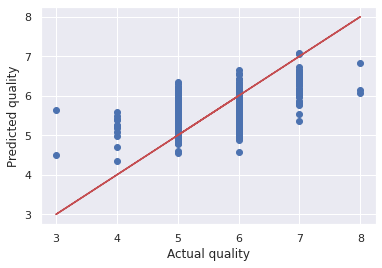

In [44]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.

### Let's try another model: DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [46]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [47]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.58125

training error=0 and test error = 0.58, this is an example of overfitted model

Text(0, 0.5, 'Predicted quality')

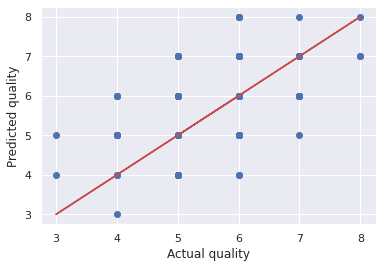

In [48]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

we will use cross-validation(CV) for robust evaluation of model performance

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Linear Regression CV

In [51]:
scores = cross_val_score(lin_reg, wine_features_tr,
    wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413968


Decision tree CV

In [52]:
scores = cross_val_score(tree_reg, wine_features_tr,
        wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard deviation: 0.16668343331737054


LinReg has better MSE and more precisee estimation compared to DecTree

Random forest CV

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, 
        wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean: 0.34565226131889765
Standard deviation: 0.0736322184302973


In [54]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34449875

Text(0, 0.5, 'Predicted quality')

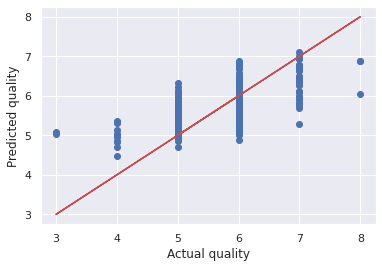

In [55]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Random forest looks more promising than other two models
 - build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.
 - Also save the models to the disk in Python `pickle` format

# Step 6:  Finetune our model

Grid Search
- We need to specify a list of hyperparameters along with the range of values to try.
- It automatically evaluates all possible combinations of hyperparameter valus using cross-validation

In [56]:
# sklearn provides a class GridSearchCV that hepls us
# in this step
from sklearn.model_selection import GridSearchCV

there are no. of hyperparmeters in RandomForest regression such as: i) No. of estimators (ii) Maximum number of features

In [57]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4 ]},
]

default value of bootstrap parameter: True

Total no. of combinatons evaluated by the parameter grid $3*4$ + $2*3$ = 18

Let's create an object of GridSearchCV:

In [58]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
            scoring='neg_mean_squared_error',
                    return_train_score=True)

total training runs = 18 * 5 = 90

In [59]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Now, to get best combination of parameters

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

Let's obtain the best estimator as follows;


In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Note: GridSeachCV is initialized with refit=True option, which retrains the best estimator on the full training set.This is likely to lead us to a better model as it is trained on a larger dataset.

Randomized Search
- When we have a large hyperparameter space, it is desirable to try RandomizedSearchCV.
- It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.
- It enables us to search hyperparameter space with appropriate budget control.

In [63]:
from sklearn.model_selection import RandomizedSearchCV

Analysis of best model and its errors

In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [65]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.2486711653610271, 'alcohol'),
 (0.14163642739406354, 'sulphates'),
 (0.12665569639367016, 'volatile acidity'),
 (0.08045272518319231, 'total sulfur dioxide'),
 (0.07275072016325315, 'density'),
 (0.05822554296729619, 'citric acid'),
 (0.05791188978825248, 'chlorides'),
 (0.057124416693656116, 'pH'),
 (0.056416454671447944, 'residual sugar'),
 (0.05388861091468478, 'fixed acidity'),
 (0.04626635046945642, 'free sulfur dioxide')]

- So, the wine quality is highly dependent on alcohol
- Based on this information, we may drop features that are not so important.
- It is also useful to analyze the errors in prediction and understand its causes and fix

Evaluation on test set
1. Transorm the test features.

In [66]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set.

In [67]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics

In [68]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.35345138888888883

4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be obtained by the following code:

In [69]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test)**2
stats.t.interval(confidence, len(squared_errors) - 1, 
                loc=squared_errors.mean(),
                scale=stats.sem(squared_errors))

(0.2915927656958191, 0.41531001208195856)

# Step 7: Present our solution

Once we have satisfactory model based on its performance on the test set, we reach the prelaunch
  Before launch, 
  1. We need to present our solution that highlights learnings, assumptions and systems limitation.
  2. Document everything, create clear visualizations and present the model.
  3. In case, the model does not work better than the experts, it may still be a good idea to lanch it and free up bandwidths of human experts.

# Step 8 : Launch, monitor and maintain your system
    Launch
       - Plug in input sources and
       - Write test cases
    Monitoring
        - System outages
        - Degradation of model performance
        - Sampling predictions for human evaluation
        - Regular assessment of data quality, which is critical for model performance
        
    Maintenance
        - Train model regularly every fixed interval with fresh data.
        - Production roll out of the model.